# Skin segmentation 

In this assignement you will train classifier to assign colors to skin or no skin classes. The data is taken from [Skin Segmentation Data Set](http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation#) in the UCI Machine Learning repository.

The  data is in a plain text format and contains four columns. First three contain RGB color data  represented as integers in the range 0-255, and the last column is an integer label  with 1 representing skin and 2 representing no skin. This file we can load directly into a numpy array:

You have to install the [scrapbook](https://github.com/nteract/scrapbook) module before using this notebook.  This will help me to automatically scan notebooks  using [papermill](https://github.com/nteract/papermill) module :) 

In [1]:
import numpy as np
import scrapbook as sb
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 8.0)

Please fill your firstname and name in the cell below.

In [2]:
sb.glue('person1',['vitoria', 'stavis'], display=True)
# In case of the two-person team add second persons
# sb.glue('person2',['your-firstname', 'your-name'])

['vitoria', 'stavis']

In [3]:
data = np.loadtxt('data/Skin_NonSkin.txt')

In [4]:
rgb  = data[:,:3]
lbl = data[:,3].astype('int32') # some function expect labels to be integers

We see that the classes are not balanced:

In [5]:
np.bincount(lbl)

array([     0,  50859, 194198])

## Problem 1 

Compare the performance of the QuadraticDiscriminantAnalysis, LinearDiscriminativeAnalysis and NaiveBayes classifiers on this set. Use the `sklearn` library when needed. Compare the confusion matrices (tnr,  fnr,fpr,tpr), precision and f1_ score and auc_score, as well ROC curves. Prepare a summary table with all the numerical scores one row per classifier and one column per metric (use pandas.DataFame). Plot all  ROC curves on the same plot and label them accordingly. Assume that skin is positive and non-skin negative. 

__Hint__ as you will be repeating this,  it's probably a good idea  to write a python function that does all the analysis. 

In [ ]:
import pandas as pd
def analize(cls, name, train_X, train_Y, test_X, test_Y):
    fprs = tprs = thds = None 
    return  pd.DataFrame({'tnr':[0],
                          'fpr':[0],
                          'fnr':[0],
                          'tpr':[0],
                          'precision' : [0],
                          'f1' :[0],
                          'auc' :[0]
                           }, index=[name]), fprs, tprs, thds

In [ ]:
analize(None, 'qda', None, None, None, None)

For each classifier use the scrapbook to save results:

In [ ]:
sb.glue('qda',['tnr', 'fpr', 'fnr', 'tpr', 'precision', 'f1', 'auc'], display=True)

In [ ]:
sb.glue('lda',['tnr', 'fpr', 'fnr', 'tpr', 'precision', 'f1', 'auc'], display=True)

In [ ]:
sb.glue('nb',['tnr', 'fpr', 'fnr', 'tpr', 'precision', 'f1', 'auc'], display=True)

also please save the ROC plot

In [ ]:
fig, ax = plt.subplots()
#plot ROCs
ax.plot([0,1],[0,1]);
sb.glue('ROC',fig, "display", display=False);

In [ ]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_score, confusion_matrix
def analize(cls, name, train_X, train_Y, test_X, test_Y):
    cls.fit(train_X, train_Y)
    proba = cls.predict_proba(test_X)[:,1]
    predicted = proba>0.5
    tnr, fpr, fnr, tpr = confusion_matrix(test_Y, predicted, normalize='true').ravel()
    f1 = f1_score(test_Y, predicted)
    prec = precision_score(test_Y, predicted)
    fprs,tprs,thds =  roc_curve(test_Y, proba)
    auc = roc_auc_score(test_Y, proba)
    return  pd.DataFrame({'tnr':[tnr],
                          'fnr':[fnr],
                          'fpr':[fpr],
                          'tpr':[tpr],
                          'precision' : [prec],
                          'f1' :[f1],
                          'auc' :[auc]
                           }, index=[name]), fprs, tprs, thds

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [ ]:
qda_cls  = QuadraticDiscriminantAnalysis()
lda_cls  = LinearDiscriminantAnalysis()
nb_cls = GaussianNB()

In [ ]:
from sklearn.model_selection import train_test_split
seed = 787667

In [ ]:
lbl = 2-lbl

In [ ]:
lbl.sum()/len(lbl)

In [ ]:
rgb_train, rgb_test, lbl_train, lbl_test = train_test_split(rgb, lbl, test_size=0.25, random_state = seed)

In [ ]:
frames = []
rocs = []
for name, cls in [('qda', qda_cls), ('lda', lda_cls),('nb', nb_cls)]:
    df, fprs, tprs, thds = analize(cls, name,rgb_train, lbl_train, rgb_test, lbl_test )
    frames.append(df)
    rocs.append((fprs, tprs, thds))

In [ ]:
pd.concat(frames, axis=0)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots()
for i,name in enumerate(['gda', 'lda', 'nb']):
    ax.plot(*rocs[i][:2],label=name)
ax.legend()    ;

## Problem 2

Repeat same analysis but with RGB  data converted to Hue  Saturation Value (HSV) format. You can use the `colorsys` module for conversion. Use the scrapbook again for saving your results appending "\_hsv" to variable name e.g.

In [ ]:
sb.glue('qda_hsv',['tnr', 'fpr', 'fnr', 'tpr', 'precision', 'f1', 'auc'], display=True)

In [ ]:
from colorsys import rgb_to_hsv
hsv = np.asarray([rgb_to_hsv(*row) for row in rgb]) #inneficient but it does not matter

In [ ]:
hsv

In [ ]:
qda_cls  = QuadraticDiscriminantAnalysis()
lda_cls  = LinearDiscriminantAnalysis()
nb_cls   = GaussianNB()

In [ ]:
hsv_train, hsv_test, lbl_train, lbl_test = train_test_split(hsv, lbl, test_size=0.25, random_state=seed)

In [ ]:
frames = []
rocs = []
for name, cls in [('qda', qda_cls), ('lda', lda_cls),('nb', nb_cls)]:
    df, fprs, tprs, thds = analize(cls, name,hsv_train, lbl_train, hsv_test, lbl_test )
    frames.append(df)
    rocs.append((fprs, tprs, thds))

In [ ]:
pd.concat(frames, axis=0)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots()
for i,name in enumerate(['gda', 'lda', 'nb']):
    ax.plot(*rocs[i][:2],label=name)
ax.legend()    

### Some plots

NameError: name 'rgb_test' is not defined

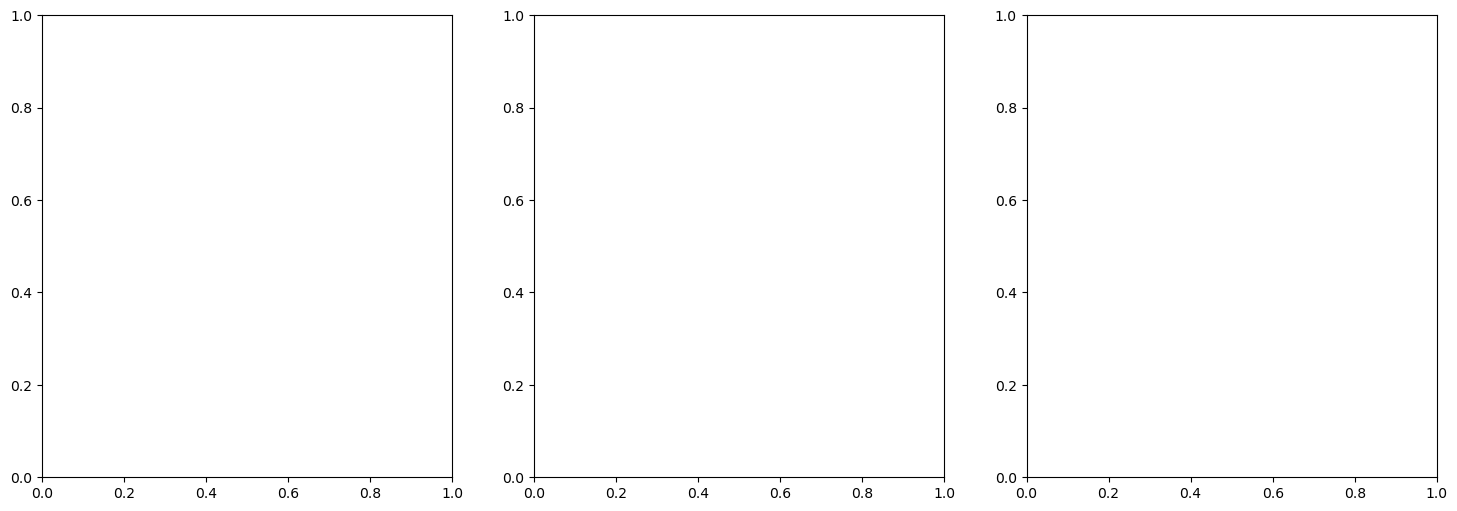

In [6]:
colors = np.asarray(['red', 'blue'])
fig,ax = plt.subplots(1,3,figsize=(18,6) )
ax[0].scatter(rgb_test[:,0], rgb_test[:,1],s=10, alpha=0.3, c=colors[lbl_test]);
ax[1].scatter(rgb_test[:,1], rgb_test[:,2],s=10, alpha=0.3, c=colors[lbl_test]);
ax[2].scatter(rgb_test[:,2], rgb_test[:,0],s=10, alpha=0.3, c=colors[lbl_test]);

In [ ]:
colors = np.asarray(['red', 'blue'])
fig,ax = plt.subplots(1,3,figsize=(18,6) )
ax[0].scatter(hsv_test[:,0], hsv_test[:,1],s=10, alpha=0.3, c=colors[lbl_test]);
ax[1].scatter(hsv_test[:,1], hsv_test[:,2],s=10, alpha=0.3, c=colors[lbl_test]);
ax[2].scatter(hsv_test[:,2], hsv_test[:,0],s=10, alpha=0.3, c=colors[lbl_test]);

In [ ]:
import  mpl_toolkits.mplot3d
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection ='3d')
n=50000
ax.scatter(rgb_test[:n,0],rgb_test[:n,1],rgb_test[:n,2], c=colors[lbl_test[:n]] );

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection ='3d')
n=50000
ax.scatter(hsv_test[:n,0],hsv_test[:n,1],hsv_test[:n,2], c=colors[lbl_test[:n]] );